# English Wikipedia page views, 2008 - 2017

For this assignment, your job is to analyze traffic on English Wikipedia over time, and then document your process and the resulting dataset and visualization according to best practices for open research that were outlined for you in class.

## Data Acquisition
We use wikipedia APIs to get page views from July 2008 to September 2017. 
1. The legacy PageCounts API provides desktop and mobile data from January 2008 till July 2016 : [Legacy PageCounts API](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Legacy_Pagecounts)
2. The PageViews API provides desktop, mobile web, and mobile app traffic data from July 2015 through September 2017. This new API lets us filter out web spiders and crawlers. : [PageView API](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews)

We call the PageCounts API twice (once for desktop and once for mobile) and the PageViews API thrice (for desktop, mobile web and mobile app) and write each data in JSON file.

All data is collected at monthly granularity

In [24]:
#Importing libraries
import requests
import json
import pandas as pd
#Define headers
headers={'User-Agent' : 'https://github.com/SalikWarsi', 'From' : 'salikw@uw.edu'}

In [18]:
#Legacy Dektop
endpoint = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

params = {'project' : 'en.wikipedia.org',
            'access-site' : 'desktop-site',
            'granularity' : 'monthly',
            'start' : '2008070100',
            'end' : '2016080100'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
response = api_call.json()

# Writing JSON data
fileName= open('pagecounts_desktop-site_200801-201607.json', 'w')
json.dump(response, fileName, indent = 4)
fileName.close()


In [23]:
#Legacy Mobile
endpoint = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

params = {'project' : 'en.wikipedia.org',
            'access-site' : 'mobile-site',
            'granularity' : 'monthly',
            'start' : '2008070100',
            'end' : '2016080100'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
response = api_call.json()

# Writing JSON data
fileName= open('pagecounts_mobile-site_200801-201607.json', 'w')
json.dump(response, fileName, indent = 4)
fileName.close()

In [20]:
#PageViews Desktop
endpoint = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

params = {'project' : 'en.wikipedia.org',
            'access' : 'desktop',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017100100'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
response = api_call.json()
# Writing JSON data
fileName= open('pageviews_desktop_201507-201709.json', 'w')
json.dump(response, fileName, indent = 4)
fileName.close()

In [21]:
#PageViews Mobile-Web
endpoint = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

params = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-web',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017100100'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
response = api_call.json()
# Writing JSON data
fileName= open('pageviews_mobile-web_201507-201709.json', 'w')
json.dump(response, fileName, indent = 4)
fileName.close()

In [22]:
#PageViews Mobile-App
endpoint = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

params = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-app',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017100100'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
response = api_call.json()
# Writing JSON data
fileName= open('pageviews_mobile-app_201507-201709.json', 'w')
json.dump(response, fileName, indent = 4)
fileName.close()

Each of the JSON requests is not written in their own files.

## Data Processing
We now process the data to convert the JSON into CSV files.

First we reach of the data frames and convert into Panda Data frames. I have created a custom function to do this for this format of JSON.

In [25]:
def jsonToDataframeWithDate(jsonSet, viewName, finalColumnName):
    '''
    This function parses the JSON of the format returned by Wikipedia and returns
    a Pandas Data Frame with 2 columns, the first 6 numbers of time stamp (month and year)
    and the column counting number of page counts or views as specified by the column
    
    jsonSet: The json returned by Wikipedia
    viewName: The original name of the value indicating Page views
    finalColumnName: Sets the Name of the column containing page views in the returned data frame as this value 
    '''
    timestamps, vals = [],[]
    for row in jsonSet["items"]:
        timestamps.append(row["timestamp"][0:6])
        vals.append(row[viewName])
    dataFrame = pd.DataFrame([timestamps,vals]).T
    dataFrame.columns = ["timestamp", finalColumnName]
    return dataFrame

In [31]:
#Reading each of the 5 Json files one by one
with open('pagecounts_desktop-site_200801-201607.json', 'r') as fileName:
    data = json.load(fileName)
    desktop_legacy = jsonToDataframeWithDate(data, 'count', 'pagecount_desktop_views')

with open('pagecounts_mobile-site_200801-201607.json', 'r') as fileName:
    data = json.load(fileName)
    mobile_legacy = jsonToDataframeWithDate(data, 'count', 'pagecount_mobile_views')

with open('pageviews_desktop_201507-201709.json', 'r') as fileName:
    data = json.load(fileName)
    desktop = jsonToDataframeWithDate(data, 'views', 'pageview_desktop_views')

with open('pageviews_mobile-web_201507-201709.json', 'r') as fileName:
    data = json.load(fileName)
    mobile_web = jsonToDataframeWithDate(data, 'views', 'pageview_mobile_web_views')

with open('pageviews_mobile-app_201507-201709.json', 'r') as fileName:
    data = json.load(fileName)
    mobile_app = jsonToDataframeWithDate(data, 'views', 'pageview_mobile_app_views')


Now we merge the Panda data frames into one, so that all the rows with same timestamp are in the same row. This enables us to add the values later on.

In [32]:
#Merging the values using timestamp as the joining key
#We use an outer join so that even if one table doesn't have the value we still get the row from the other table
Views = desktop_legacy.merge(mobile_legacy, left_on='timestamp', right_on='timestamp', how='outer')
Views = Views.merge(desktop, left_on='timestamp', right_on='timestamp', how='outer')
Views = Views.merge(mobile_web, left_on='timestamp', right_on='timestamp', how='outer')
Views = Views.merge(mobile_app, left_on='timestamp', right_on='timestamp', how='outer')

#Setting null values (NaN)as 0
Views = Views.fillna(0)

Further we process the data in the following ways:
1. Adding the columns to get the total values
2. Parsing time stamp to get year and month
3. Keeping only the required columns and in the correct order

In [33]:
#Adding the columns
#The new API breaks down mobile views into web and app: Adding them up to get total mobile views
Views['pageview_mobile_views'] = Views['pageview_mobile_web_views'] + Views['pageview_mobile_app_views']

#Getting total Page Counts and Page Views using the 2 APIs
Views['pagecount_all_views'] = Views['pagecount_desktop_views'] + Views['pagecount_mobile_views']
Views['pageview_all_views'] = Views['pageview_desktop_views'] + Views['pageview_mobile_views']


In [42]:
#Parsing TimeStamp
Views['year'] = Views['timestamp'].str[0:4]   #First 4 digits denote the Year
Views['month'] = Views['timestamp'].str[4:6]  #5th and 6th Digit denote the month

In [43]:
#Keeping ony the required Columns
Views = Views[['year','month','pagecount_all_views','pagecount_desktop_views',
              'pagecount_mobile_views','pageview_all_views','pageview_desktop_views','pageview_mobile_views']]

After processing we write it all to a csv file so we can directly start from this step in the future

In [45]:
Views.to_csv('en-wikipedia_traffic_200801-201709.csv',index=False)

## Data Analysis

For this we draw a chart plotting how the page views have changed over time. I used matplotlib library to create a plot. I read data from the CSV file we have just written and converted year and month values into DateTime. Then I plot the data both as an inline image as well as a png file for later consumption. 

Populating the interactive namespace from numpy and matplotlib


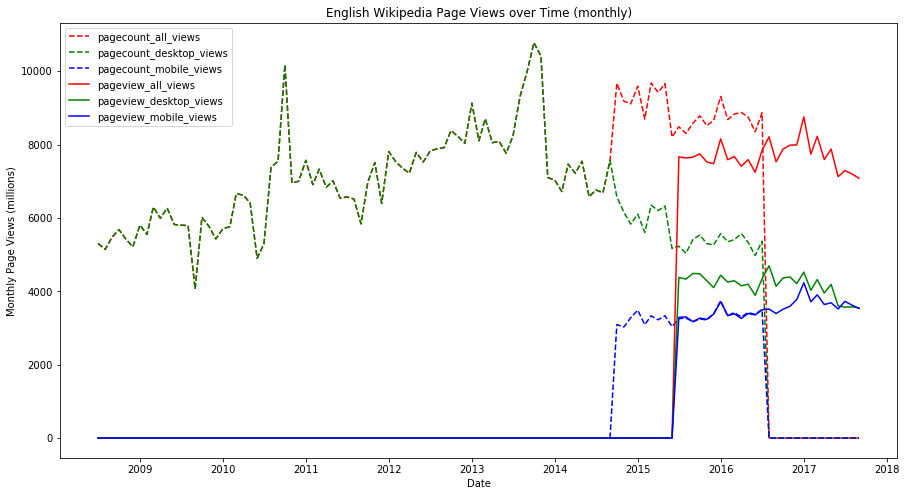

In [64]:
import matplotlib.pyplot as plt  # Import the matplotlib plotting library
#For display in notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 8)

#Read from CSV
Views = pd.read_csv('en-wikipedia_traffic_200801-201709.csv')

#Convert the year and month into date time for plotting
Views['date'] = Views['year'].astype(str) + "-" + Views['month'].astype(str) + "-01"
Views['dateTime'] = pd.to_datetime(Views['date'], format="%Y-%m-%d")

plt.plot(Views['dateTime'],Views['pagecount_all_views']/1000000,'r--')
plt.plot(Views['dateTime'],Views['pagecount_desktop_views']/1000000,'g--')
plt.plot(Views['dateTime'],Views['pagecount_mobile_views']/1000000,'b--')
plt.plot(Views['dateTime'],Views['pageview_all_views']/1000000,'r')
plt.plot(Views['dateTime'],Views['pageview_desktop_views']/1000000,'g')
plt.plot(Views['dateTime'],Views['pageview_mobile_views']/1000000,'b')
plt.legend(loc='upper left')
plt.xlabel('Date')  # Add a label to the x-axis
plt.ylabel('Monthly Page Views (millions)')  # Add a label to the y-axis
plt.title('English Wikipedia Page Views over Time (monthly)')  # Add a plot title

plt.savefig('PageViewsWikipediaEn.png')
plt.show()